In [1]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import crystalball, norm
from epi_analysis import df_make_separation

%matplotlib inline
matplotlib.rc("figure", dpi=200)

dir_path = os.path.dirname(os.path.realpath("__file__"))
print(f"Believed path is: {dir_path}")

Believed path is: /home/romanov/eic/kak-bog-cherepahu/analysis


In [2]:
import pandas as pd

all_vals_df = pd.read_feather("/mnt/work/data/epi/21x21/2022_12_05_cherepaha_SciGlass-4-1-LB_21x21_20x20x400mm_0.7-18GeV_e-pi-_20kev-each.feather")
all_vals_df["e_div_p"] = all_vals_df.de_sum/(all_vals_df.p*1000)
all_vals_df.head()
epi_title = "E/P SciGlass"

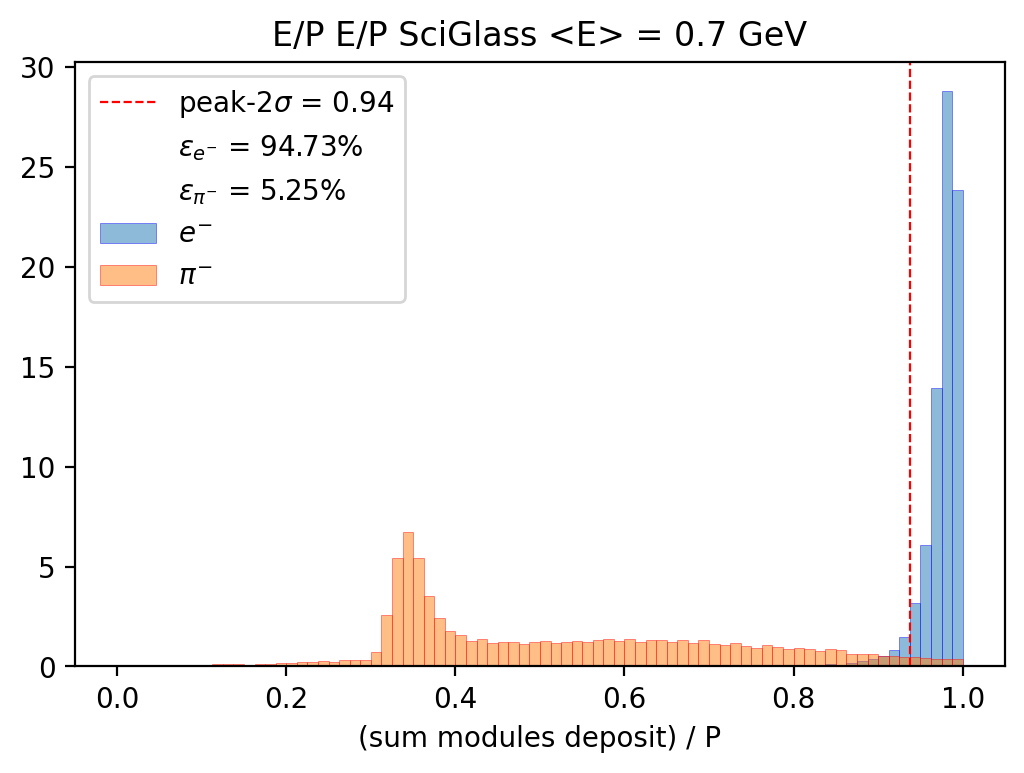

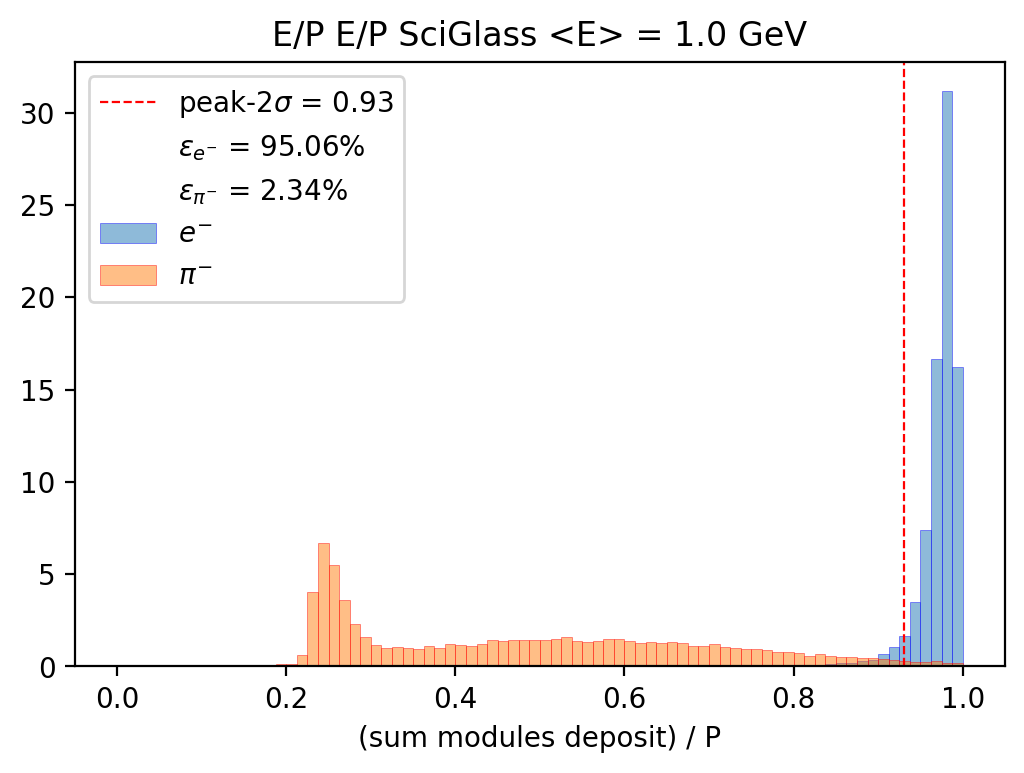

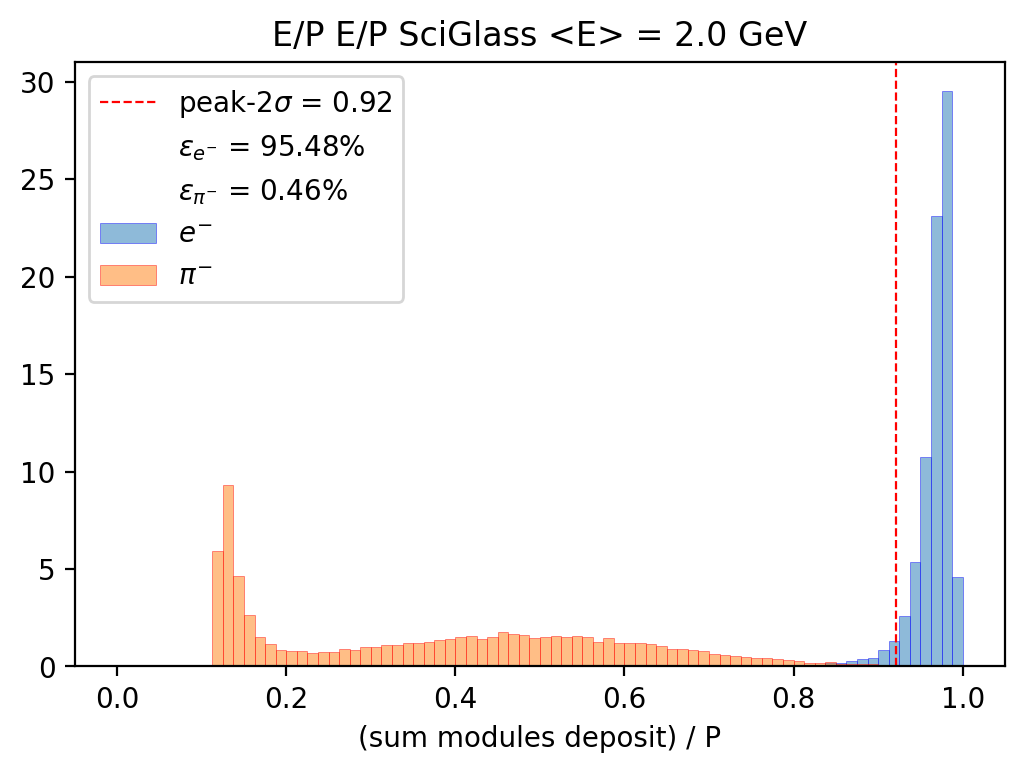

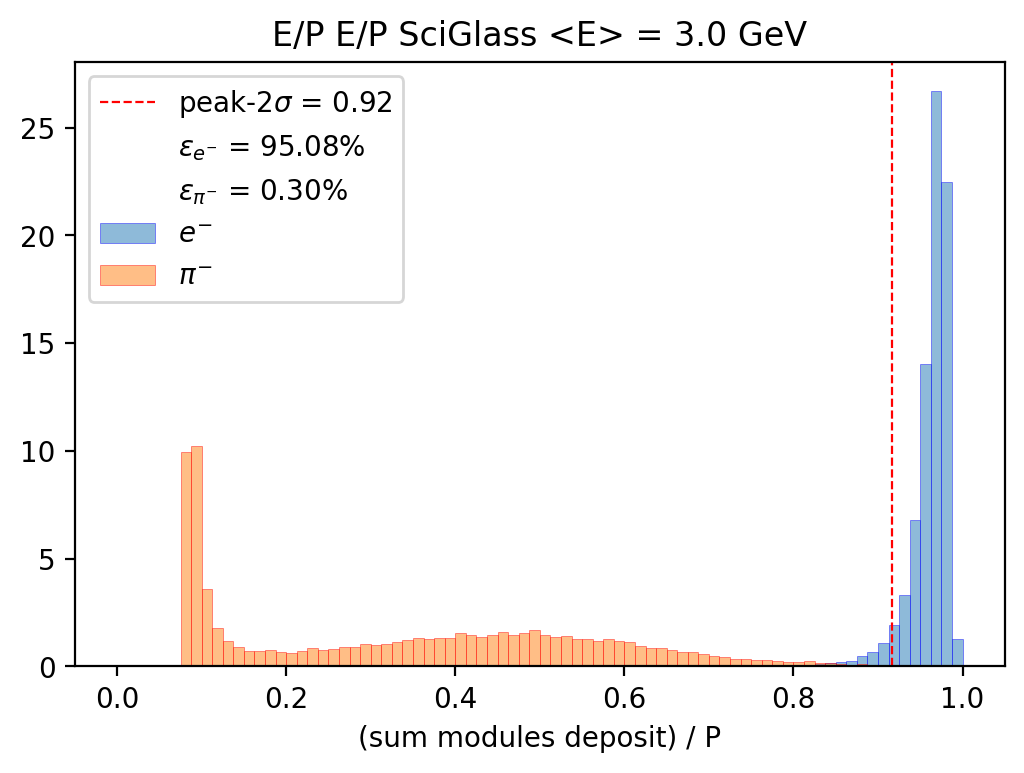

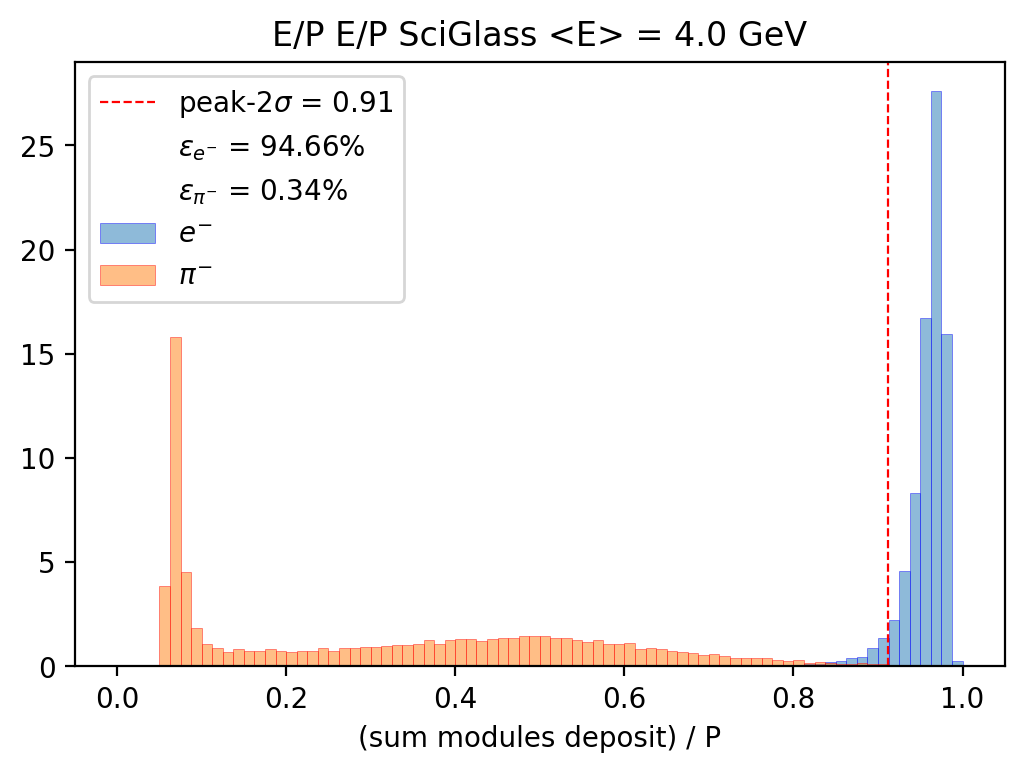

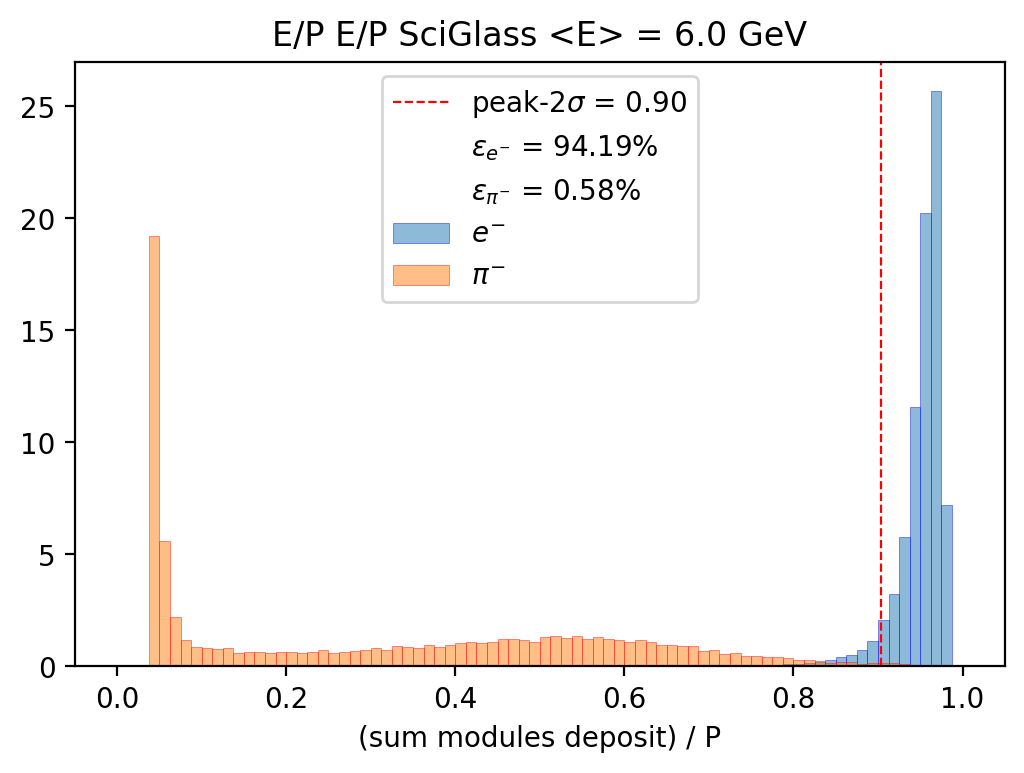

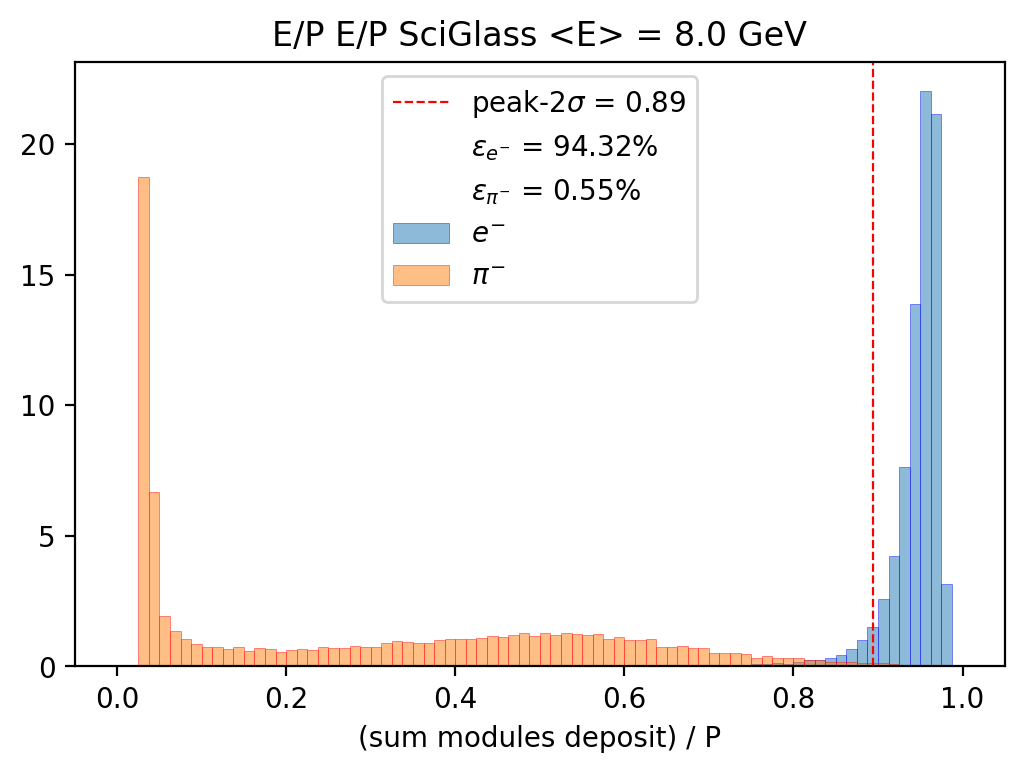

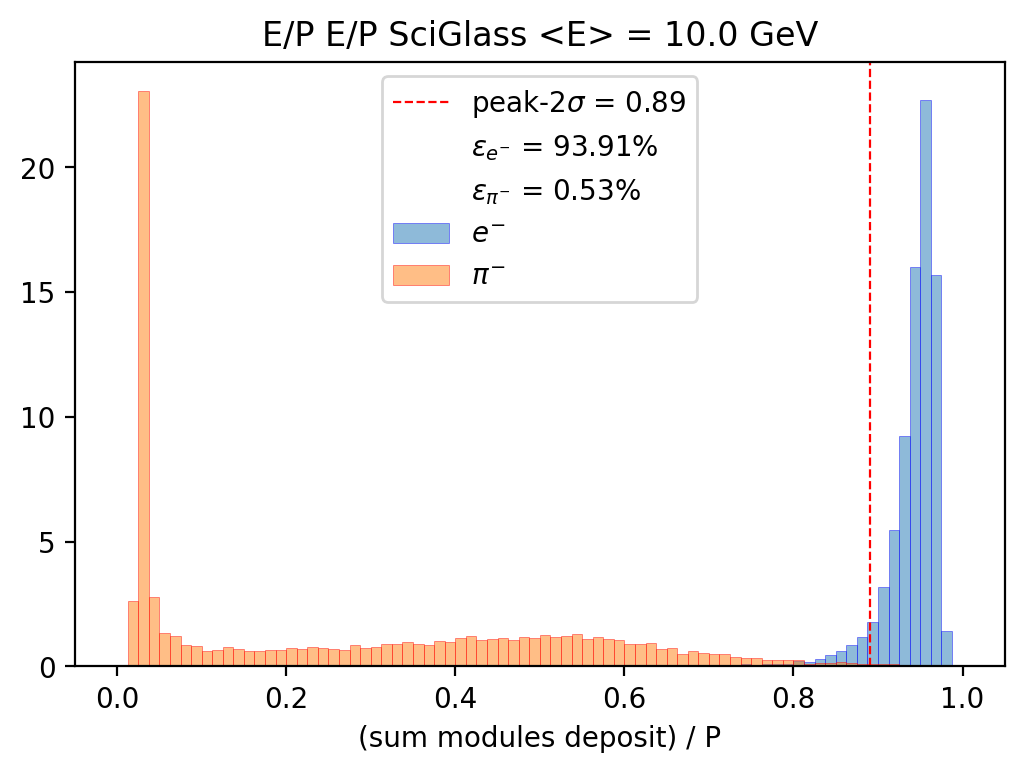

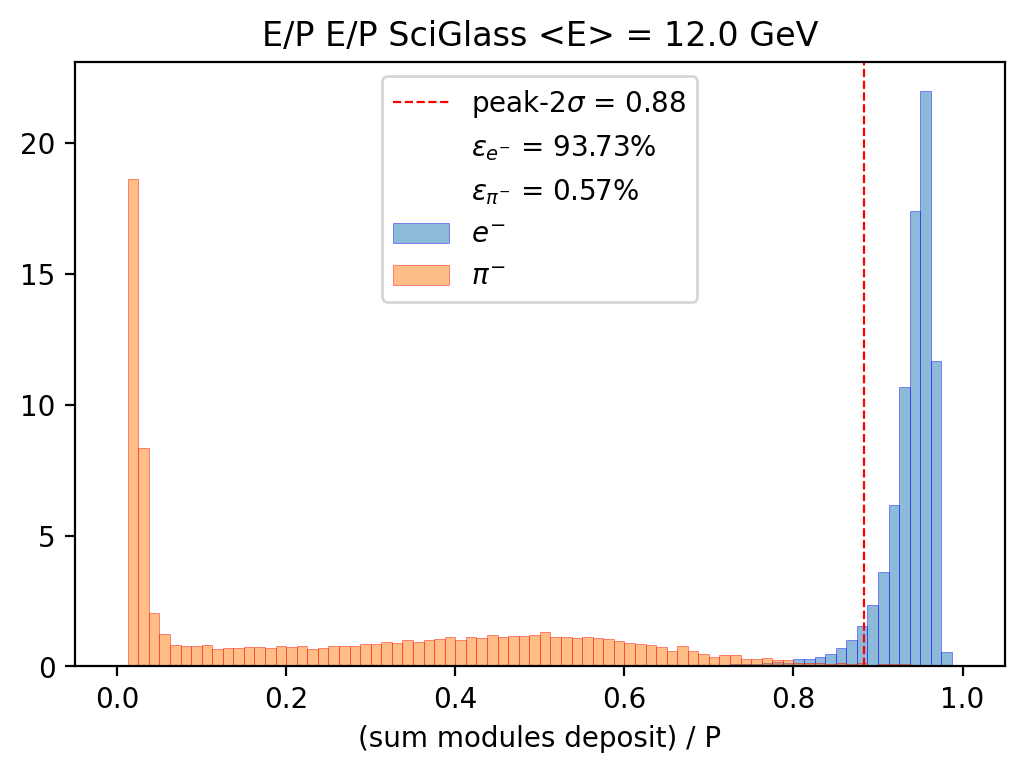

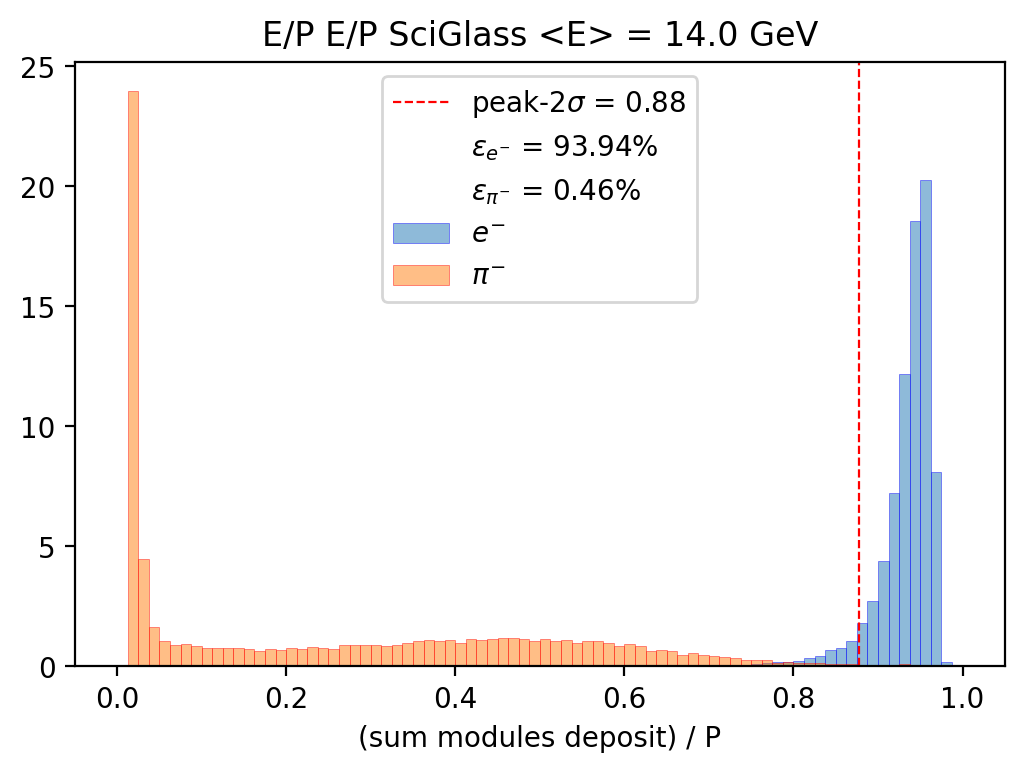

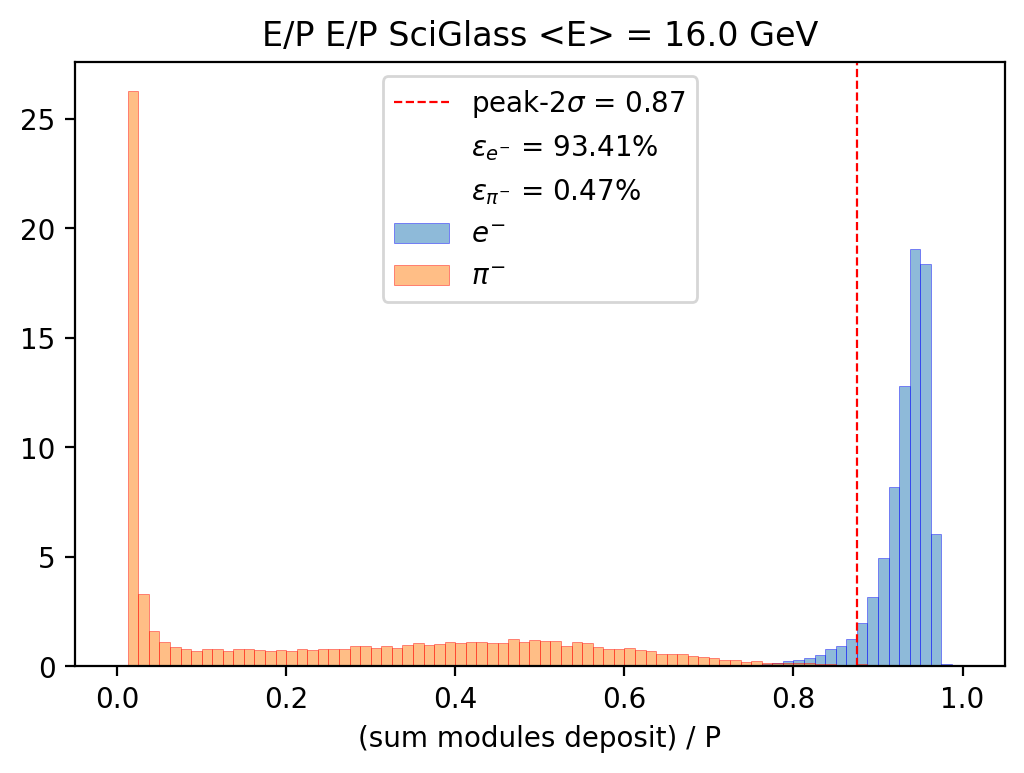

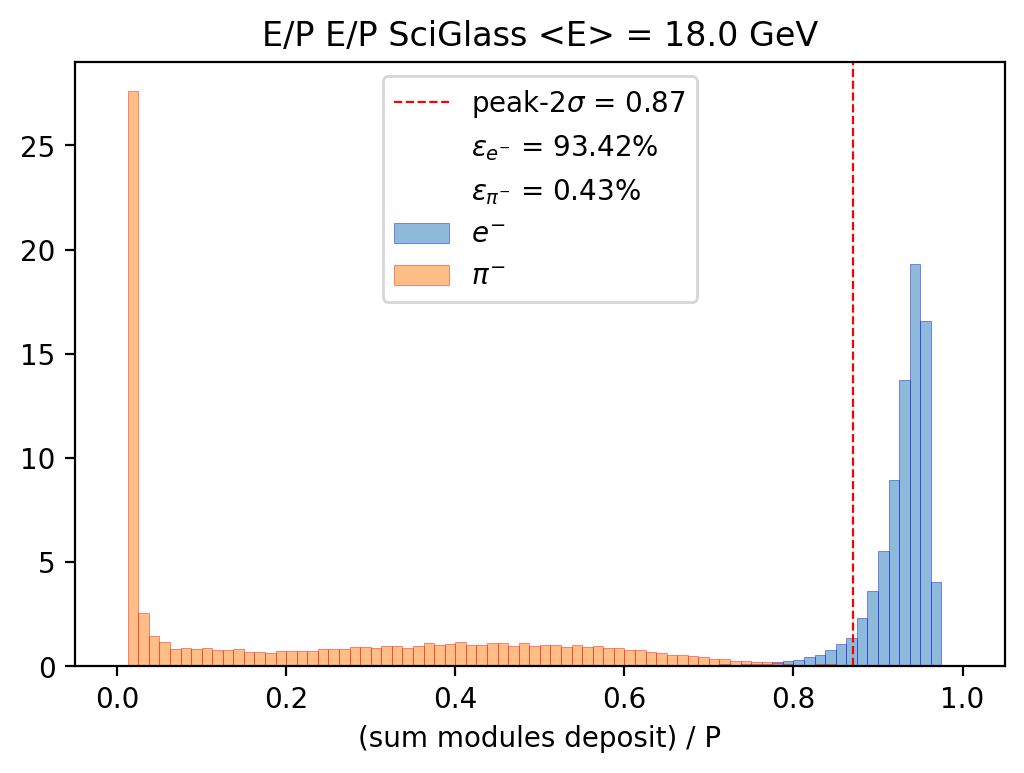

In [3]:
all_momentums = all_vals_df.groupby("p").mean().index

results_list = []

for p in all_momentums:
    fit_data = df_make_separation(all_vals_df, p, epi_title, separ_sigmas=2)
    cb_loc, norm_sigma, separ_x, n_e_above_num, n_e_above, n_pi_above_num, n_pi_above, n_e_below_num, n_e_below, fig, axs = fit_data
    data={
        "p":p,
        "cb_loc": cb_loc, 
        "norm_sigma": norm_sigma, 
        "separ_x": separ_x,
        "n_e_above_num": n_e_above_num, 
        "n_e_above": n_e_above, 
        "n_pi_above_num": n_pi_above_num, 
        "n_pi_above": n_pi_above, 
        "n_e_below_num":n_e_below_num, 
        "n_e_below:":n_e_below, 
        "fig": fig,
        "axs": axs
    }
    results_list.append(data)
    
results = pd.DataFrame(results_list)

In [4]:
results["rfactor"] = results.n_e_above/results.n_pi_above
results

,p,cb_loc,norm_sigma,separ_x,n_e_above_num,n_e_above,n_pi_above_num,n_pi_above,n_e_below_num,n_e_below:,fig,axs,rfactor
0,0.7,0.990609,0.026421,0.937768,18946,0.94730,1051,0.05255,1054,0.05270,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",18.026641
1,1.0,0.986348,0.028011,0.930326,19013,0.95065,469,0.02345,987,0.04935,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",40.539446
2,2.0,0.979448,0.029244,0.920961,19097,0.95485,91,0.00455,903,0.04515,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",209.857143
3,3.0,0.975039,0.029479,0.916080,19015,0.95075,60,0.00300,985,0.04925,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",316.916667
4,4.0,0.972044,0.030068,0.911908,18932,0.94660,69,0.00345,1068,0.05340,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",274.376812
5,6.0,0.967091,0.031725,0.903641,18837,0.94185,116,0.00580,1163,0.05815,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",162.387931
6,8.0,0.963480,0.034855,0.893771,18864,0.94320,110,0.00550,1136,0.05680,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",171.490909
7,10.0,0.959543,0.034467,0.890609,18781,0.93905,105,0.00525,1219,0.06095,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",178.866667
8,12.0,0.956561,0.036781,0.883000,18746,0.93730,115,0.00575,1254,0.06270,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",163.008696
9,14.0,0.953206,0.037639,0.877928,18788,0.93940,91,0.00455,1212,0.06060,Figure(1200x800),"AxesSubplot(0.125,0.125;0.775x0.755)",206.461538


<AxesSubplot:xlabel='p'>

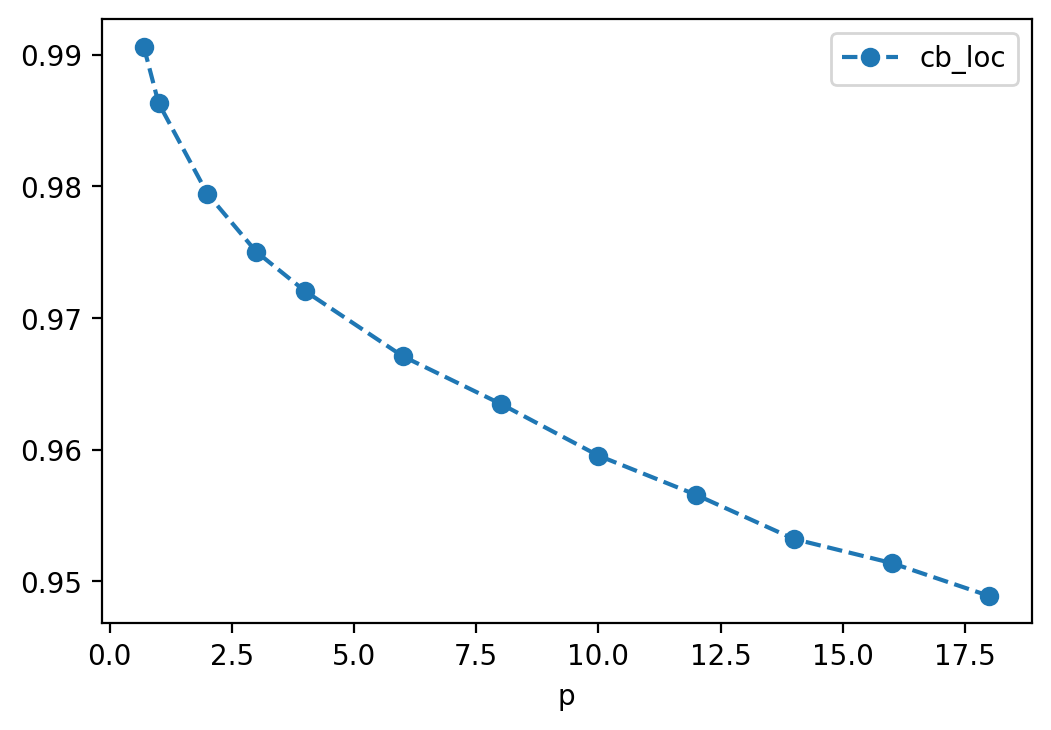

In [5]:
results.plot(x="p", y="cb_loc", style="o--")

<AxesSubplot:xlabel='p'>

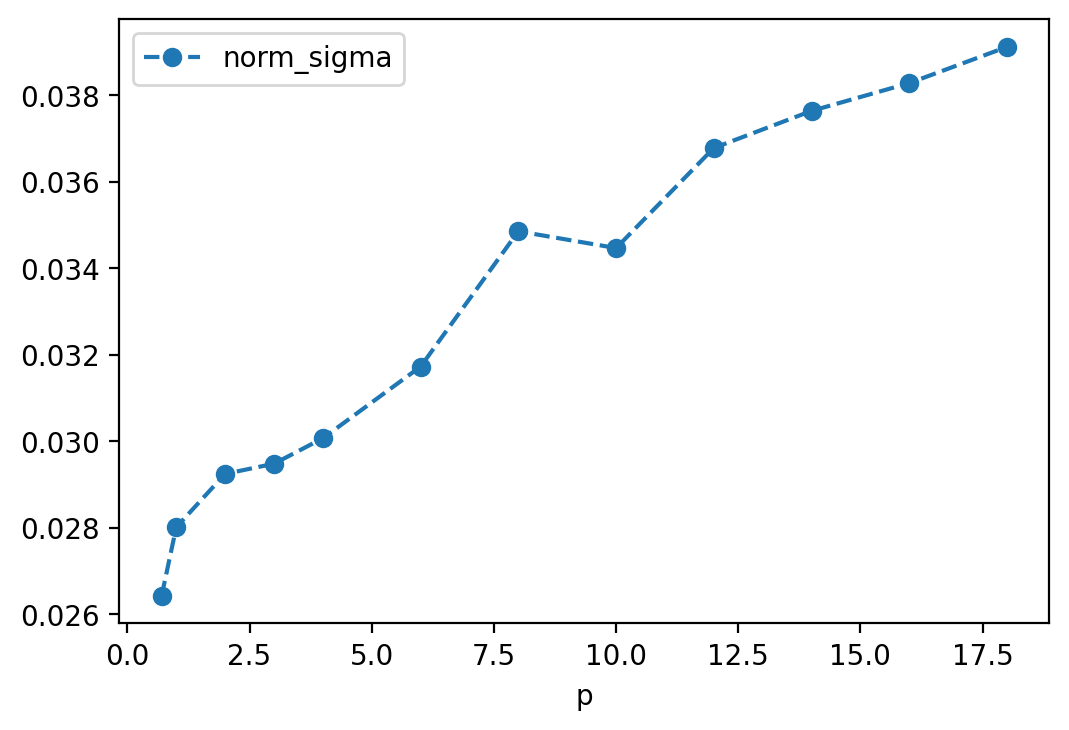

In [6]:
results.plot(x="p", y="norm_sigma", style="o--")

<AxesSubplot:xlabel='p'>

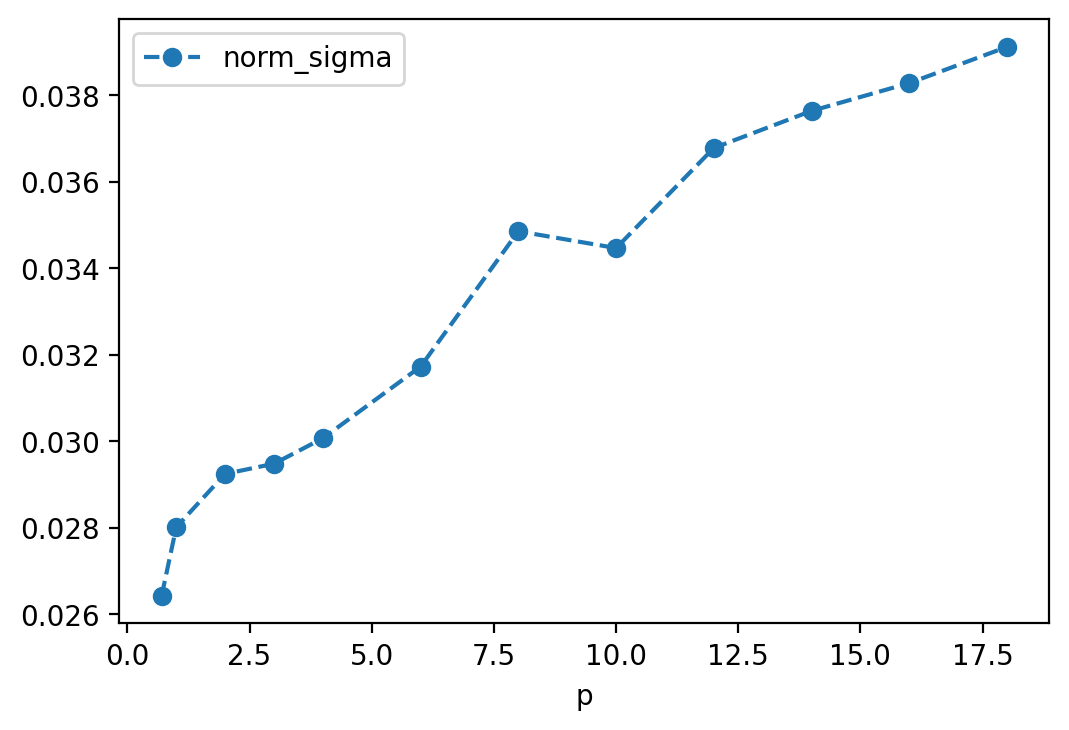

In [7]:
results.plot(x="p", y="norm_sigma", style="o--")